# DETERMINACIÓN DE TIPOS DE ESTRELLAS - P2 - ML


## Implementacion de k-means

La clase k-means esta implementada en modules/k_means.py

### Comparacion de nuestra implementacion con la de sklearn


In [42]:
from modules import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as KMeans_sklearn
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Time KMeans:  0.016358137130737305
Time KMeans sklearn:  0.017845869064331055


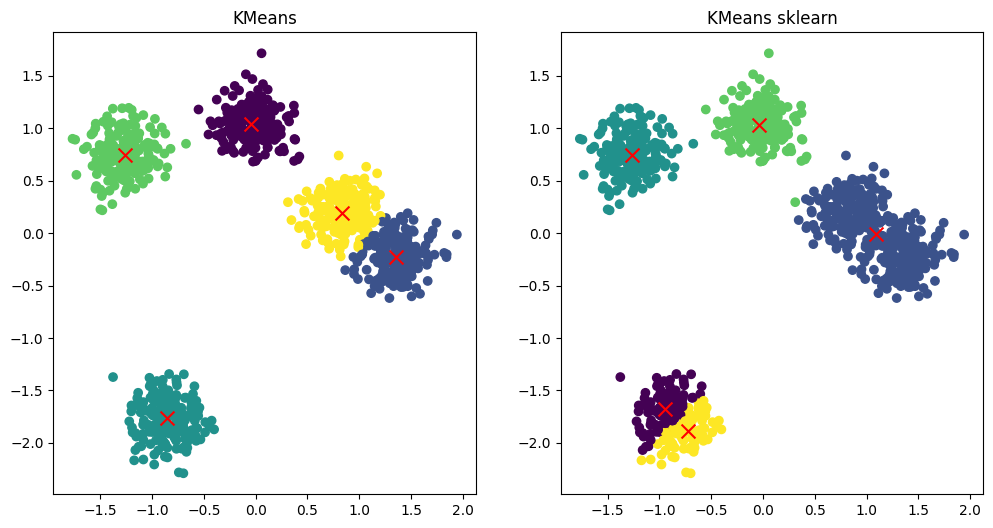

Centroides KMeans
[[-0.04213115  1.03758373]
 [ 1.35031791 -0.22633541]
 [-0.85442343 -1.76560504]
 [-1.26636442  0.7483735 ]
 [ 0.83597143  0.19272841]]
Centroides KMeans sklearn
[[-0.94894014 -1.67591278]
 [ 1.08929295 -0.01284821]
 [-1.26636442  0.7483735 ]
 [-0.04037143  1.03388817]
 [-0.72654788 -1.88695338]]
Silhouette score KMeans
0.6806597714929805
Silhouette score KMeans sklearn
0.620724887884989


In [43]:
# comparar con datos basicos de 2 dimensiones nuestro KMeans con el de sklearn
# generar datos ruidosos
X, y = make_blobs(n_samples=1000, centers=5, n_features=2, random_state=42)


# escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)


# instanciar los modelos
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=42, tolerance=1e-4)
kmeans_sklearn = KMeans_sklearn(n_clusters=5, max_iter=1000, random_state=42, tol=1e-4)

start = time.time()
kmeans.fit(X)
end = time.time()
print("Time KMeans: ", end - start)

start = time.time()
kmeans_sklearn.fit(X)
end = time.time()
print("Time KMeans sklearn: ", end - start)

# graficar los datos en un solo plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("KMeans")
plt.scatter(X[:, 0], X[:, 1], c=kmeans.predict(X))
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=100, marker='x')
plt.subplot(1, 2, 2)
plt.title("KMeans sklearn")
plt.scatter(X[:, 0], X[:, 1], c=kmeans_sklearn.predict(X))
plt.scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1], c='red', s=100, marker='x')
plt.show()

# print de los centroides
print("Centroides KMeans")
print(kmeans.centroids)
print("Centroides KMeans sklearn")
print(kmeans_sklearn.cluster_centers_)

# print del silhouette score
print("Silhouette score KMeans")
print(silhouette_score(X, kmeans.predict(X)))
print("Silhouette score KMeans sklearn")
print(silhouette_score(X, kmeans_sklearn.predict(X)))


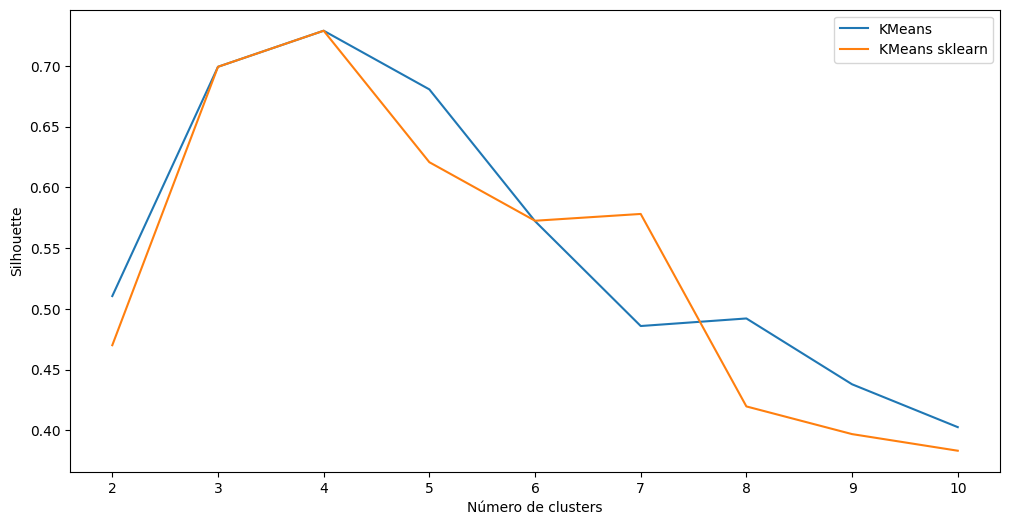

In [44]:
# graficar el coeficiente de silueta
silhouette_values = []
silhouette_values_sklearn = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, max_iter=10000, random_state=42, tolerance=1e-7)
    kmeans_sklearn = KMeans_sklearn(n_clusters=i, max_iter=10000, random_state=42, tol=1e-7)
    kmeans.fit(X)
    kmeans_sklearn.fit(X)
    silhouette_values.append(silhouette_score(X, kmeans.predict(X)))
    silhouette_values_sklearn.append(silhouette_score(X, kmeans_sklearn.predict(X)))
    
plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_values, label="KMeans")
plt.plot(range(2, 11), silhouette_values_sklearn, label="KMeans sklearn")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette")
plt.legend()
plt.show()

### Conclusiones
Observando la gráfica que representa el coefinciente de silueta, se puede apreciar cómo nuestro modelo de K-means y el de sklearn coinciden en el número optimo de clusters, incluso cuando los datos generados con __make_blobs__ se generan con 5 clusters, ambos modelos llegan a una misma conclusión (4 clusters). Teniendo en cuenta, además los tiempos de ejecución, podemos quedarnos profundamente satisfechos con nuestra implementación, ya que en gran cantidad de ocasiones el tiempo de ejecución de nuestro código es considerablemente menor. 

## EDA y procesamiento de los datos de entrada

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 100471939

In [46]:
stars_df = pd.read_csv('enunciado/Stars2.csv')
display(stars_df.head())
display(stars_df.describe())

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


In [47]:
# VER LAS ETIQUETAS DE COLORES UNICAS
print(stars_df['Color'].unique())
print(len(stars_df['Color'].unique()))

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
17


In [48]:
# corregir las etiquetas de color, poner todas en minusulas y con guion, sin espacios
stars_df['Color'] = stars_df['Color'].str.lower().str.replace(' ', '-')
# volver a ver las etiquetas de colores
print(stars_df['Color'].unique())
print(len(stars_df['Color'].unique()))

['red' 'blue-white' 'white' 'yellowish-white' 'pale-yellow-orange' 'blue'
 'whitish' 'yellow-white' 'orange' 'white-yellow' 'yellowish' 'orange-red']
12


In [49]:
# hacer one hot encoding de la columna color
stars_df_hot_encoded = pd.get_dummies(stars_df, columns=['Color'])
display(stars_df_hot_encoded.head())

# codificar como variable ordinal color siguiendo el orden:
# ['Red', 'Orange-Red', 'Orange', 'Pale yellow orange', 'Yellowish','yellow-white','Whitish','Yellowish White','White-Yellow','White','Blue-white','Blue']
stars_df['Color'] = stars_df['Color'].astype('category')
stars_df['Color'] = stars_df['Color'].cat.reorder_categories(['red', 'orange-red', 'orange', 'pale-yellow-orange', 'yellowish', 'yellow-white', 'whitish', 'yellowish-white', 'white-yellow', 'white', 'blue-white', 'blue'], ordered=True)
stars_df['Color'] = stars_df['Color'].cat.codes
display(stars_df.head())

,Temperature,L,R,A_M,Spectral_Class,Color_blue,Color_blue-white,Color_orange,Color_orange-red,Color_pale-yellow-orange,Color_red,Color_white,Color_white-yellow,Color_whitish,Color_yellow-white,Color_yellowish,Color_yellowish-white
0,3068,0.002400,0.1700,16.12,M,False,False,False,False,False,True,False,False,False,False,False,False
1,3042,0.000500,0.1542,16.60,M,False,False,False,False,False,True,False,False,False,False,False,False
2,2600,0.000300,0.1020,18.70,M,False,False,False,False,False,True,False,False,False,False,False,False
3,2800,0.000200,0.1600,16.65,M,False,False,False,False,False,True,False,False,False,False,False,False
4,1939,0.000138,0.1030,20.06,M,False,False,False,False,False,True,False,False,False,False,False,False


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,M
1,3042,0.000500,0.1542,16.60,0,M
2,2600,0.000300,0.1020,18.70,0,M
3,2800,0.000200,0.1600,16.65,0,M
4,1939,0.000138,0.1030,20.06,0,M


In [50]:
# ver los valores unicos de la columna Spectral_Class
print(stars_df['Spectral_Class'].unique())
print(len(stars_df['Spectral_Class'].unique()))


['M' 'B' 'A' 'F' 'O' 'K' 'G']
7


In [51]:
# codificar como variable ordinal Spectral_Class siguiendo el orden:
# ['M', 'K', 'G', 'F', 'A', 'B', 'O']

stars_df['Spectral_Class'] = stars_df['Spectral_Class'].astype('category')
stars_df['Spectral_Class'] = stars_df['Spectral_Class'].cat.reorder_categories(['M', 'K', 'G', 'F', 'A', 'B', 'O'], ordered=True)
stars_df['Spectral_Class'] = stars_df['Spectral_Class'].cat.codes
display(stars_df.head())

# hacer one hot encoding de la columna Spectral_Class
stars_df_hot_encoded = pd.get_dummies(stars_df_hot_encoded, columns=['Spectral_Class'])
display(stars_df_hot_encoded.head())


,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,0,0
1,3042,0.000500,0.1542,16.60,0,0
2,2600,0.000300,0.1020,18.70,0,0
3,2800,0.000200,0.1600,16.65,0,0
4,1939,0.000138,0.1030,20.06,0,0


,Temperature,L,R,A_M,Color_blue,Color_blue-white,Color_orange,Color_orange-red,Color_pale-yellow-orange,Color_red,...,Color_yellow-white,Color_yellowish,Color_yellowish-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
1,3042,0.000500,0.1542,16.60,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,2600,0.000300,0.1020,18.70,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,2800,0.000200,0.1600,16.65,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,1939,0.000138,0.1030,20.06,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False


In [52]:
from sklearn.preprocessing import StandardScaler

# Para el DataFrame original
scaler = StandardScaler()
stars_df_scaled = stars_df.copy()
# Escalamos todas las columnas
stars_df_scaled.iloc[:] = scaler.fit_transform(stars_df_scaled.iloc[:])
display(stars_df_scaled.head())

# Para el DataFrame one-hot encoded
scaler = StandardScaler()
stars_df_hot_encoded_scaled = stars_df_hot_encoded.copy()
# Escalamos todas las columnas
stars_df_hot_encoded_scaled.iloc[:] = scaler.fit_transform(stars_df_hot_encoded_scaled.iloc[:])
display(stars_df_hot_encoded_scaled.head())



/tmp/ipykernel_16101/3262497869.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.7793821  -0.78210961 -0.82847728 -0.80749644 -0.89781898 -0.80330027
 -0.82459583 -0.82847728 -0.82323207 -0.81798686 -0.72357305 -0.77298294
 -0.77245842 -0.72063573 -0.82323207 -0.75084815 -0.80760134 -0.71392186
 -0.76637397 -0.74025282  1.52137764 -0.2892695  -0.34381971 -0.20954228
  0.62969162  0.26147775 -0.20219898 -0.29346567  0.13559266 -0.34277066
  2.99003697  2.04589883  0.50128883 -0.0836572  -0.49278372 -0.25653938
 -0.39239037 -0.43193926 -0.47851675 -0.51512833 -0.69986469 -0.74822554
 -0.75819144 -0.76553474 -0.78567635 -0.72357305 -0.72619565 -0.72630056
 -0.72095044  2.43928972 -0.73511251 -0.70783741 -0.69902545 -0.70794231
 -0.71832783 -0.73930868 -0.71727879 -0.73930868 -0.7076276  -0.73039182
 -0.75074324 -0.74119696 -0.78829896 -0.80382479 -0.79333436 -0.75556884
 -0.79228532 -0.80571306 -0.81022395 -0.8

,Temperature,L,R,A_M,Color,Spectral_Class
0,-0.779382,-0.598624,-0.459210,1.116745,-1.008818,-0.997781
1,-0.782110,-0.598624,-0.459241,1.162414,-1.008818,-0.997781
2,-0.828477,-0.598624,-0.459342,1.362213,-1.008818,-0.997781
3,-0.807496,-0.598624,-0.459229,1.167171,-1.008818,-0.997781
4,-0.897819,-0.598624,-0.459340,1.491607,-1.008818,-0.997781


/tmp/ipykernel_16101/3262497869.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.7793821  -0.78210961 -0.82847728 -0.80749644 -0.89781898 -0.80330027
 -0.82459583 -0.82847728 -0.82323207 -0.81798686 -0.72357305 -0.77298294
 -0.77245842 -0.72063573 -0.82323207 -0.75084815 -0.80760134 -0.71392186
 -0.76637397 -0.74025282  1.52137764 -0.2892695  -0.34381971 -0.20954228
  0.62969162  0.26147775 -0.20219898 -0.29346567  0.13559266 -0.34277066
  2.99003697  2.04589883  0.50128883 -0.0836572  -0.49278372 -0.25653938
 -0.39239037 -0.43193926 -0.47851675 -0.51512833 -0.69986469 -0.74822554
 -0.75819144 -0.76553474 -0.78567635 -0.72357305 -0.72619565 -0.72630056
 -0.72095044  2.43928972 -0.73511251 -0.70783741 -0.69902545 -0.70794231
 -0.71832783 -0.73930868 -0.71727879 -0.73930868 -0.7076276  -0.73039182
 -0.75074324 -0.74119696 -0.78829896 -0.80382479 -0.79333436 -0.75556884
 -0.79228532 -0.80571306 -0.81022395 -0.

,Temperature,L,R,A_M,Color_blue,Color_blue-white,Color_orange,Color_orange-red,Color_pale-yellow-orange,Color_red,...,Color_yellow-white,Color_yellowish,Color_yellowish-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,-0.779382,-0.598624,-0.459210,1.116745,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
1,-0.782110,-0.598624,-0.459241,1.162414,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
2,-0.828477,-0.598624,-0.459342,1.362213,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
3,-0.807496,-0.598624,-0.459229,1.167171,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
4,-0.897819,-0.598624,-0.459340,1.491607,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214


## Análisis de Componentes Principales 

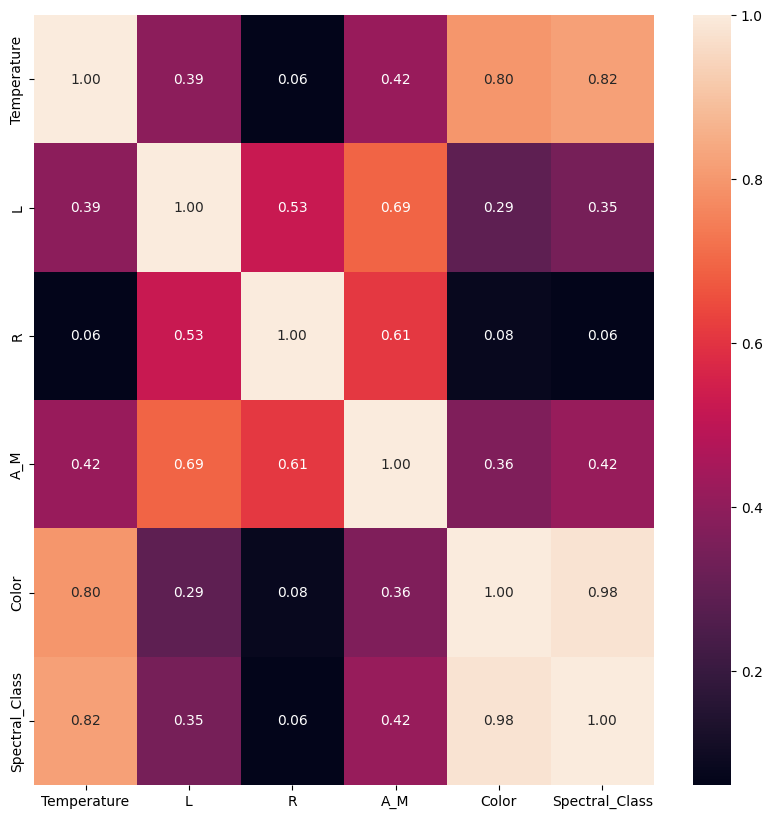

In [53]:
# Generaremos, primero de todo, una matriz de correlación de las variables.
# Para el DataFrame original.
corr = abs(stars_df_scaled.corr())
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

Como se puede observar en la matriz, existen variables con gran correlación entre sí, lo que hace que tenga mucho sentido reducir la dimensionalidad del problema haciendo uso de componentes principales. Procederemos analizando el número óptimo de estas variables con el que realizaremos el modelo de nuestro problema. 

In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=SEED)
pca.fit(stars_df_scaled.copy())
stars_pca = pca.transform(stars_df_scaled)


# crear un df con los datos de PCA
stars_pca_df = pd.DataFrame(data=stars_pca, columns=['PCA1', 'PCA2', 'PCA3'])
print(f"Proporción de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporción acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

Proporción de varianza explicada: [0.55409866 0.29691252 0.06395951]
Proporción acumulada: [0.55409866 0.85101118 0.91497069]


Reduciendo la dimensionalidad del problema a 3 nos devuelve una proporción acumulada del 91%, un valor considerablemente bueno. No obstante, consideramos que con dos componentes principales, se obtiene un valor de 85%, que proporcionalmente es mejor además de reducir complejidad y aumentar visibilidad al problema. 

<Axes: xlabel='PCA1', ylabel='PCA2'>

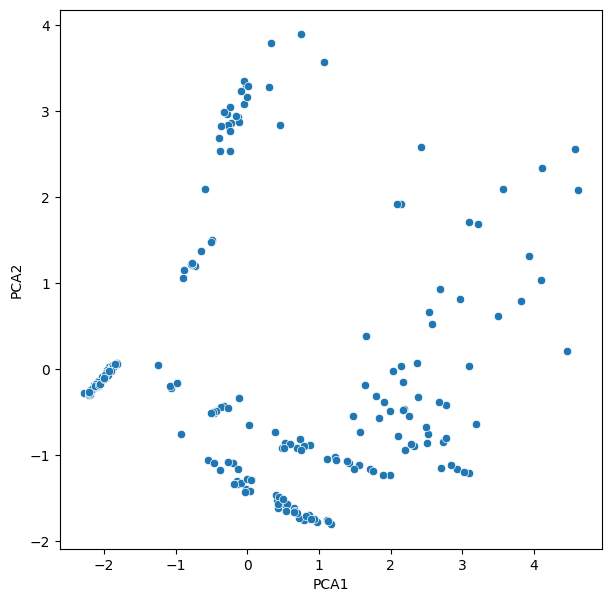

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=SEED)
pca.fit(stars_df_scaled.copy())
stars_pca = pca.transform(stars_df_scaled)

stars_pca_df = pd.DataFrame(data=stars_pca, columns=['PCA1', 'PCA2'])

plt.figure(figsize=(7, 7))
sns.scatterplot(x='PCA1', y='PCA2', data=stars_pca_df)


## Comparación de métodos de agrupación
Vamos a comparar tres modelos distintos de agrupación:
- K-means
- Jerárquico
- Basado en densidad

Evaluaremos su rendimiento con el coeficiente de silueta.

### K-means


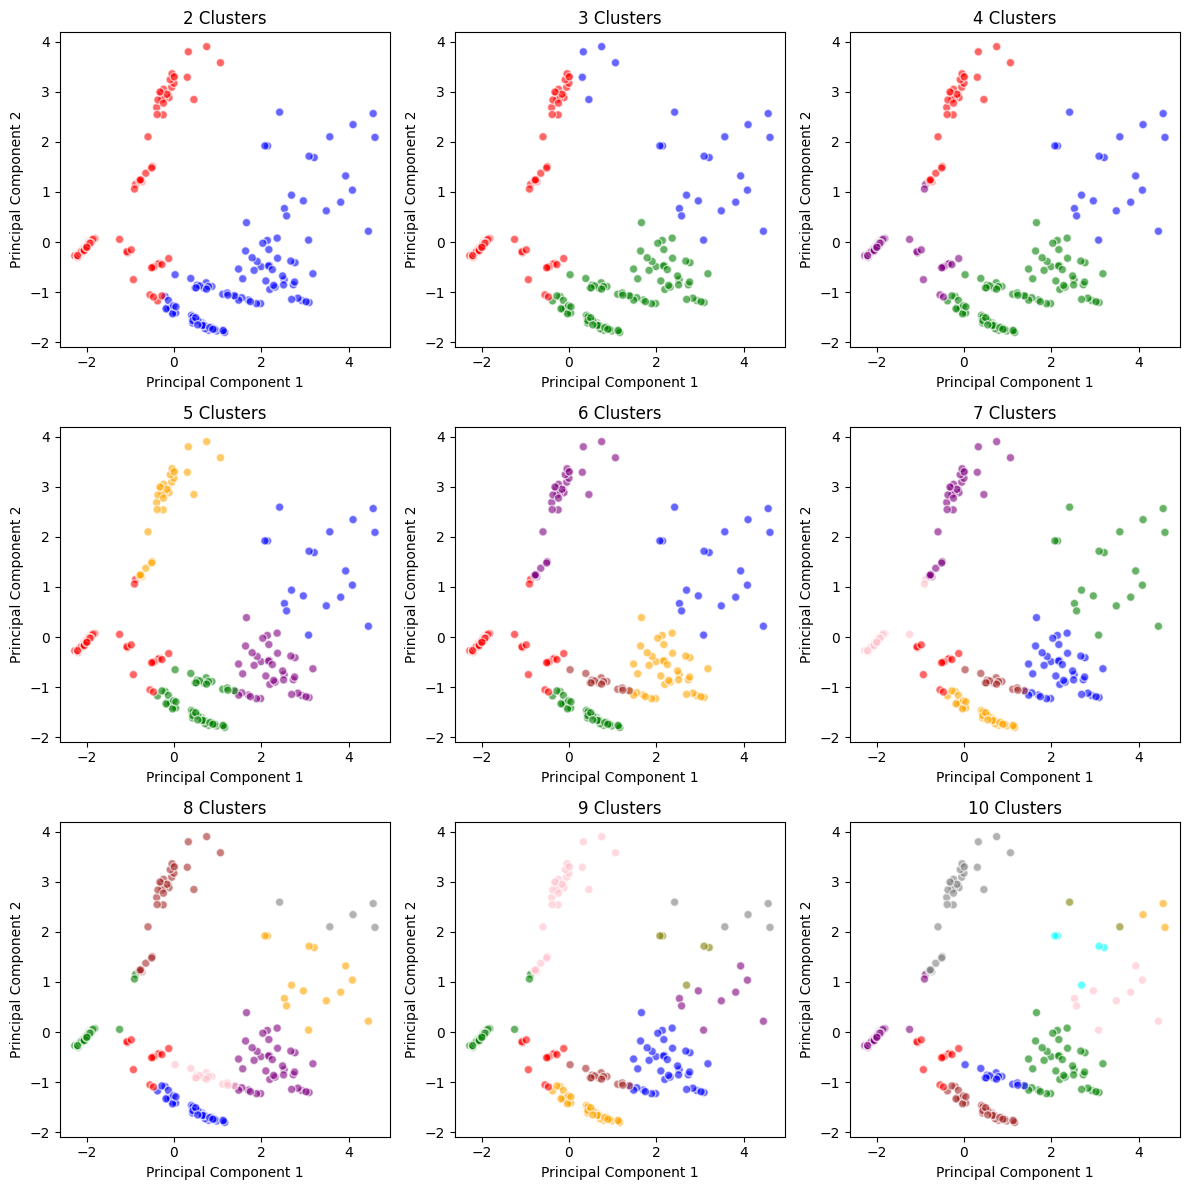

In [56]:
import matplotlib.pyplot as plt
from modules import KMeans

# Asumiendo que 'stars_pca_df' tiene dos componentes principales que deseamos graficar
# y las etiquetas de clusters han sido añadidas al dataframe.
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=SEED)
    kmeans.fit(stars_pca_df)
    stars_pca_df[f'cluster_{n_clusters}'] = kmeans.predict(stars_pca_df)

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 2x2 grid de subplots
axes = axes.flatten()  # Convertir la matriz de axes en un array 1D para iterar fácilmente

# Colores para los clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, ax in enumerate(axes):
    n_clusters = i + 2  # Los clusters varían de 2 a 5
    # Escoger colores para cada cluster
    cluster_colors = [colors[j] for j in stars_pca_df[f'cluster_{n_clusters}']]
    
    # Crear scatter plot en el subplot correspondiente
    scatter = ax.scatter(stars_pca_df['PCA1'], stars_pca_df['PCA2'], c=cluster_colors, alpha=0.6, edgecolor='w')
    
    # Establecer título para cada subplot
    ax.set_title(f'{n_clusters} Clusters')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

# Ajustar el layout para evitar solapamiento de los subplots
plt.tight_layout()
plt.show()


### Jerárquico

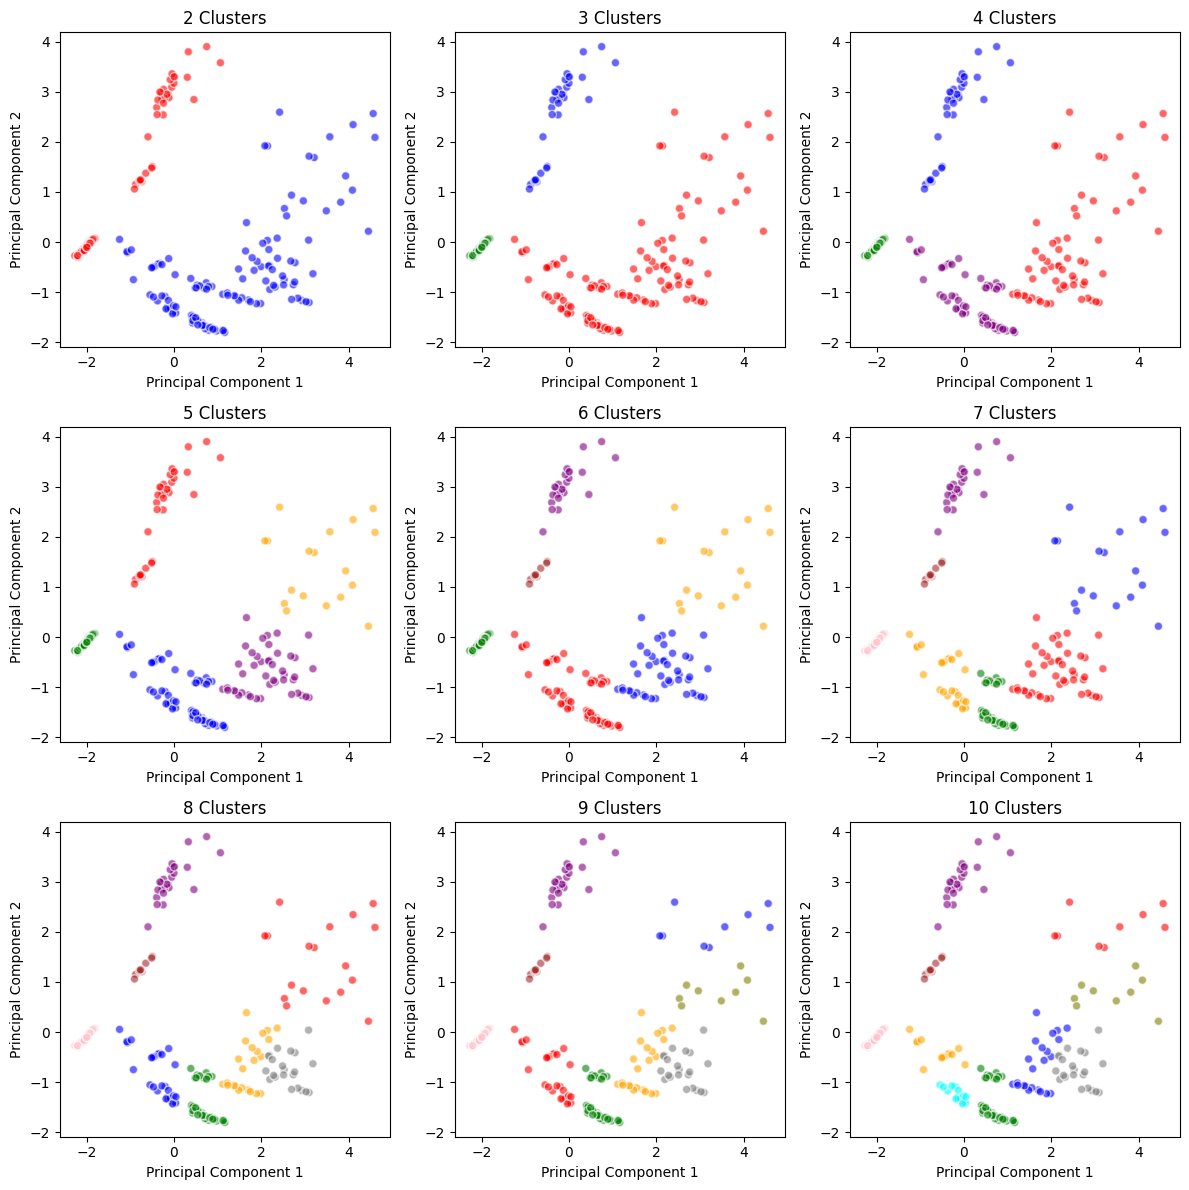

In [57]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Asumiendo que 'stars_pca_df' tiene dos componentes principales 'PCA1' y 'PCA2' que deseamos graficar
# y las etiquetas de clusters han sido añadidas al dataframe.
for n_clusters in range(2, 11):
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # No hay necesidad de usar fit_predict aquí ya que AgglomerativeClustering no tiene predict
    cluster_labels = clustering.fit_predict(stars_pca_df[['PCA1', 'PCA2']])
    stars_pca_df[f'cluster_{n_clusters}'] = cluster_labels

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid de subplots
axes = axes.flatten()  # Convertir la matriz de axes en un array 1D para iterar fácilmente

# Colores para los clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, ax in enumerate(axes):
    n_clusters = i + 2  # Los clusters varían de 2 a 10
    # Escoger colores para cada cluster
    cluster_colors = [colors[j] for j in stars_pca_df[f'cluster_{n_clusters}']]
    
    # Crear scatter plot en el subplot correspondiente
    scatter = ax.scatter(stars_pca_df['PCA1'], stars_pca_df['PCA2'], c=cluster_colors, alpha=0.6, edgecolor='w')
    
    # Establecer título para cada subplot
    ax.set_title(f'{n_clusters} Clusters')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

# Ajustar el layout para evitar solapamiento de los subplots
plt.tight_layout()
plt.show()


### Basado en densidad

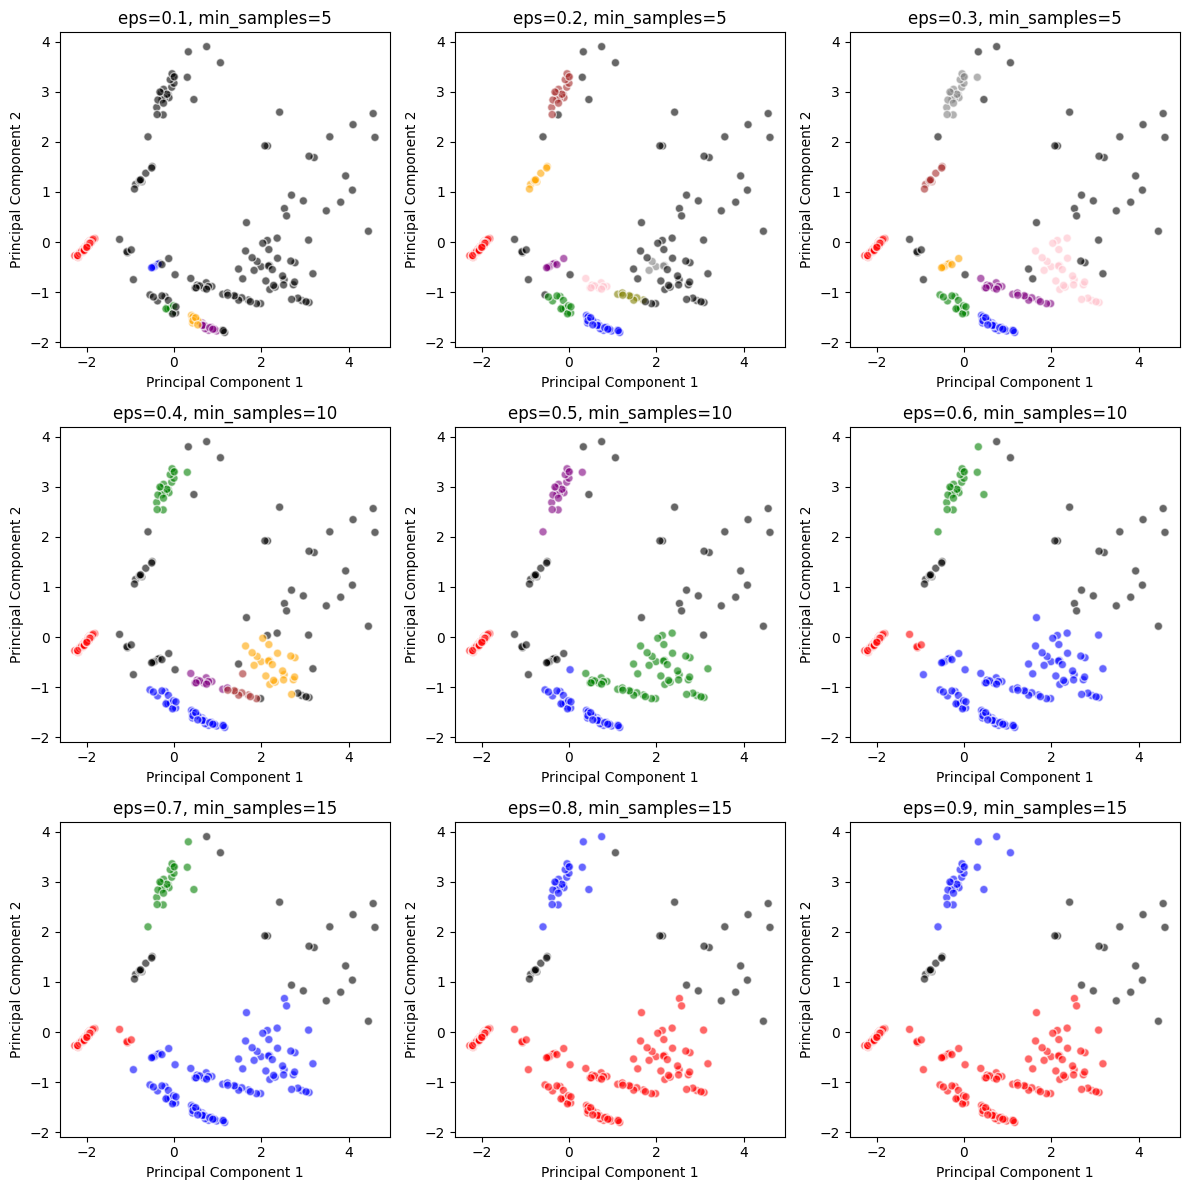

In [58]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Configuración de la figura y los ejes
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 grid de subplots
axes = axes.flatten()  # Convertir la matriz de axes en un array 1D para iterar fácilmente

# Colores para los clusters (podría necesitar más dependiendo de los datos)
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Diferentes configuraciones de eps y min_samples para explorar
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
min_samples_values = [5, 5, 5, 10, 10, 10, 15, 15, 15]

for i, ax in enumerate(axes):
    # Configuración de DBSCAN para cada subplot
    dbscan = DBSCAN(eps=eps_values[i], min_samples=min_samples_values[i])
    cluster_labels = dbscan.fit_predict(stars_pca_df[['PCA1', 'PCA2']])
    stars_pca_df[f'dbscan_eps{eps_values[i]}_min{min_samples_values[i]}'] = cluster_labels
    
    # Asignar un color a cada cluster, incluyendo ruido (-1) en negro
    unique_labels = set(cluster_labels)
    cluster_colors = [colors[label] if label != -1 else 'black' for label in cluster_labels]
    
    # Crear scatter plot en el subplot correspondiente
    scatter = ax.scatter(stars_pca_df['PCA1'], stars_pca_df['PCA2'], c=cluster_colors, alpha=0.6, edgecolor='w')
    
    # Establecer título para cada subplot
    ax.set_title(f'eps={eps_values[i]}, min_samples={min_samples_values[i]}')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

# Ajustar el layout para evitar solapamiento de los subplots
plt.tight_layout()
plt.show()


Como se puede observar, tanto KMeans como un modelo Jerárquico ofrecen resultados significativamente buenos, al contrario que el modelo basado en densidad, que como era de esperar, no reproduce tan bien los grupos visibles en el gráfico. Para un mejor análisis, graficaremos las funciones codo y el índice silueta de Kmeans con 5, 6, y 7 clusters y lo mismo para el modelo Jerárquico.

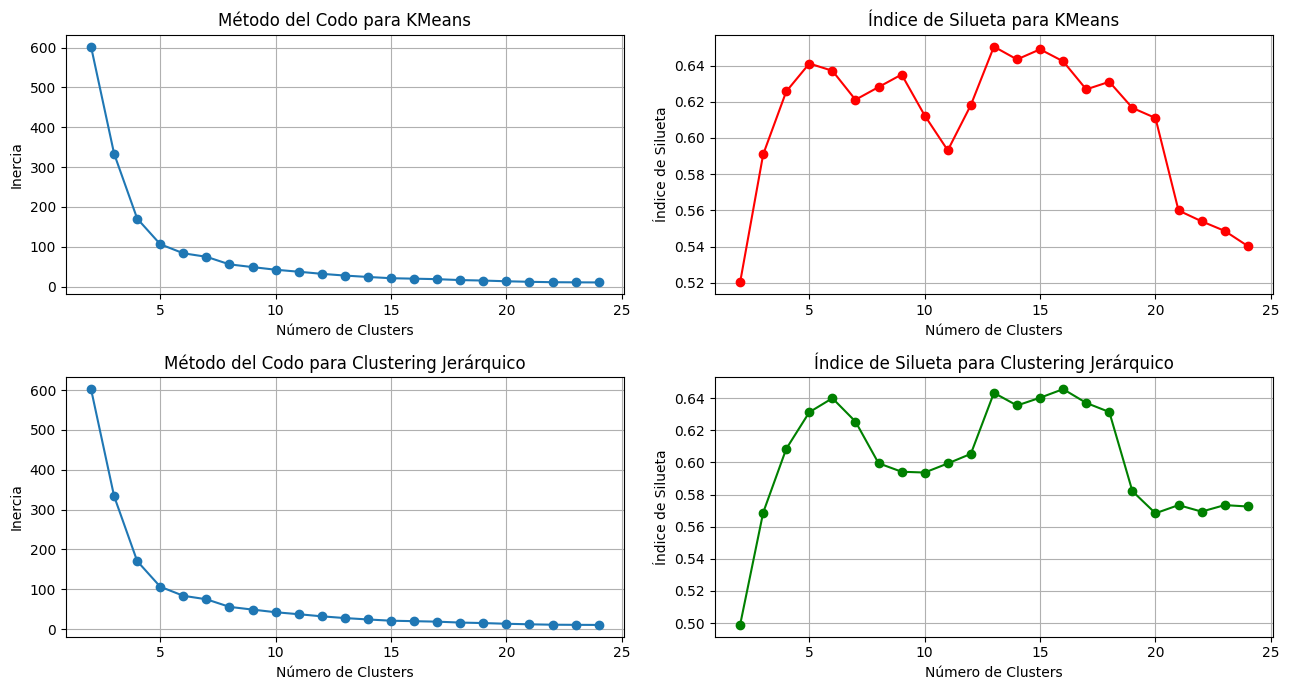

In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Rango de número de clusters a evaluar
n_clusters = range(2, 25)

# Listas para almacenar resultados de KMeans
kmeans_inertias = []
kmeans_silhouettes = []

# Listas para almacenar resultados de Clustering Jerárquico
hierarchical_silhouettes = []

# DataFrame original sin las etiquetas de clusters
X = stars_pca_df[['PCA1', 'PCA2']]

# Calcular métricas para KMeans
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    labels = kmeans.fit_predict(X)
    kmeans_inertias.append(kmeans.inertia_)
    kmeans_silhouettes.append(silhouette_score(X, labels))

# Calcular métricas para Clustering Jerárquico
for k in n_clusters:
    hierarchical = AgglomerativeClustering(n_clusters=k)
    labels = hierarchical.fit_predict(X)
    hierarchical_silhouettes.append(silhouette_score(X, labels))

# Configuración de la figura y los ejes
fig, axes = plt.subplots(2, 2, figsize=(13, 7))
axes = axes.flatten()

# Gráfico del método del codo para KMeans
axes[0].plot(n_clusters, kmeans_inertias, marker='o')
axes[0].set_title("Método del Codo para KMeans")
axes[0].set_xlabel("Número de Clusters")
axes[0].set_ylabel("Inercia")
axes[0].grid(True)

# Gráfico de Índice de Silueta para KMeans
axes[1].plot(n_clusters, kmeans_silhouettes, marker='o', color='r')
axes[1].set_title("Índice de Silueta para KMeans")
axes[1].set_xlabel("Número de Clusters")
axes[1].set_ylabel("Índice de Silueta")
axes[1].grid(True)

# Gráfico del método del codo para Clustering Jerárquico
axes[2].plot(n_clusters, kmeans_inertias, marker='o')
axes[2].set_title("Método del Codo para Clustering Jerárquico")
axes[2].set_xlabel("Número de Clusters")
axes[2].set_ylabel("Inercia")
axes[2].grid(True)

# Gráfico de Índice de Silueta para Clustering Jerárquico
axes[3].plot(n_clusters, hierarchical_silhouettes, marker='o', color='g')
axes[3].set_title("Índice de Silueta para Clustering Jerárquico")
axes[3].set_xlabel("Número de Clusters")
axes[3].set_ylabel("Índice de Silueta")
axes[3].grid(True)

# Ajustar el layout para evitar solapamiento de los subplots
fig.tight_layout()
plt.show()


### Conclusiones
A pesar de que Kmeans y clutering jerárquico otorgan resultados muy parecidos, el modelo de Kmeans presenta una ligera mejoría en el mejor de sus índices silueta. Además, genera 5 grupos distintos, lo que se acerca considerablemente a la clasificación del modelo científico real. Por otra parte, en su gráfica se puede observar una distribución de los grupos lógica.

A parte,cabe mencionar un comportamiento curioso de las gráficas que representan el índice silueta. A pesar de que parece que el máximo índice silueta de Kmeans se encuentra con el valor correspondiente a 5 clusters, nada más lejos de la realidad; si se incrementa el número de clusters a valores considerablemente altos (>12) se observa una profunda mejoría en la gráfica, la cual tiende al valor 1. Esto puede ser explicado debido al sobreajuste del clasificador, pero es un completo sin-sentido tener tal número de agrupaciones y por ello hemos decidido quedarnos con el máximo local visible en la función correspondiente a 5 clusters.

## Comparacion de los metodos de codificacion de variables categoricas
Vamos a entrenar en k-means con distintos métodos de codificación de variables categóricas.

In [60]:
# normalizar y escalar los datos de el df one hot encoded
scaler = StandardScaler()
stars_df_hot_encoded_scaled = stars_df_hot_encoded.copy()
stars_df_hot_encoded_scaled = scaler.fit_transform(stars_df_hot_encoded_scaled)
# construir un df con los datos escalados
stars_df_hot_encoded_scaled = pd.DataFrame(stars_df_hot_encoded_scaled, columns=stars_df_hot_encoded.columns)
display(stars_df_hot_encoded_scaled.head())


,Temperature,L,R,A_M,Color_blue,Color_blue-white,Color_orange,Color_orange-red,Color_pale-yellow-orange,Color_red,...,Color_yellow-white,Color_yellowish,Color_yellowish-white,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,-0.779382,-0.598624,-0.459210,1.116745,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
1,-0.782110,-0.598624,-0.459241,1.162414,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
2,-0.828477,-0.598624,-0.459342,1.362213,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
3,-0.807496,-0.598624,-0.459229,1.167171,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214
4,-0.897819,-0.598624,-0.459340,1.491607,-0.551677,-0.453905,-0.09167,-0.064685,-0.064685,1.069045,...,-0.185695,-0.112509,-0.112509,-0.293211,-0.486943,-0.276104,-0.064685,-0.160128,1.078036,-0.447214


In [61]:
# Función para calcular el índice de silueta
def calculate_silhouette(X):
    kmeans = KMeans(n_clusters=5, random_state=SEED)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    return silhouette_avg

# Calcular el índice de silueta para One Hot Encoding
silhouette_onehot = calculate_silhouette(stars_df_hot_encoded_scaled)

# Calcular el índice de silueta para Codificación Ordinal
silhouette_ordinal = calculate_silhouette(stars_df_scaled)

print(f'Silhouette Score with One Hot Encoding: {silhouette_onehot}')
print(f'Silhouette Score with Ordinal Encoding: {silhouette_ordinal}')


Silhouette Score with One Hot Encoding: 0.43683247247056783
Silhouette Score with Ordinal Encoding: 0.5254740140959283


En el contexto de nuestro análisis, se observa cómo one-hot-encoding es significativamente peor que el método de codificación ordinal para variables categóricas. Es por ello que optaremos por usar (como lo hemos estado haciendo) el data-frame con variables categóricas codificadas de forma ordinal.

## Pipeline de preprocesamiento
1. Codificación de variables categóricas con **label encoding** en orden concreto
2. Escalado de variables con **StandardScaler** 
3. Agrupación con **k-means** 

Hemos encontrado que la mejor solución es usar label encoding en orden concreto (menor a mayor energia, o viceversa):
- Color: `['Red', 'Orange-Red', 'Orange', 'Pale yellow orange', 'Yellowish','yellow-white','Whitish','Yellowish White','White-Yellow','White','Blue-white','Blue']`
- Spectral_Class: `['M', 'K', 'G', 'F', 'A', 'B', 'O']`
 
Despues usar StandardScaler para el escalado de variables y por último agrupar con k-means, con 5 clusters y minimo `10000 iteraciones`, una tolerancia minima de `1e-4`, y un start de `kmeans++`.


In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from modules import KMeans

final_model = KMeans(n_clusters=5, max_iter=10_000, random_state=SEED)
final_model.fit(stars_pca_df[['PCA1', 'PCA2']])
stars_pca_df['Cluster'] = final_model.predict(stars_pca_df[['PCA1', 'PCA2']])

# Crear un DataFrame con las estrellas originales y sus etiquetas de cluster
final_df = stars_df.copy()
final_df['Cluster'] = stars_pca_df['Cluster']

# Devolvemos el valor alfanumérico a las variables categóricas
final_df['Color'] = final_df['Color'].astype('category')
final_df['Color'] = final_df['Color'].cat.rename_categories(['red', 'orange-red', 'orange', 'pale-yellow-orange', 'yellowish', 'yellow-white', 'whitish', 'yellowish-white', 'white-yellow', 'white', 'blue-white', 'blue'])

final_df['Spectral_Class'] = final_df['Spectral_Class'].astype('category')
final_df['Spectral_Class'] = final_df['Spectral_Class'].cat.rename_categories(['M', 'K', 'G', 'F', 'A', 'B', 'O'])

## Similitud entre los grupos obtenidos y los utilizados en Astronomía

In [63]:
# Imprimiremos una tabla con la media de cada atributo NO CATEGORICO por cluster y la moda de los atributos categóricos
# para cada cluster

# separamos el df en eno con Temperature, L, R, A_M y Cluster y otro con Color, Spectral_Class y Cluster
df_numeric = final_df[['Temperature', 'L', 'R', 'A_M', 'Cluster']]
df_categorical = final_df[['Color', 'Spectral_Class', 'Cluster']]

# Calculamos el mínimo de cada atributo numérico por cluster
cluster_means = df_numeric.groupby('Cluster').mean()

# Calculamos las dos mayores modas de cada atributo categórico por cluster
cluster_modes = df_categorical.groupby('Cluster').agg(lambda x: x.value_counts().index[0:2].tolist()).applymap(lambda x: list(map(str, x)))


# Concatenar ambos DataFrames
cluster_info = pd.concat([cluster_means, cluster_modes], axis=1)

# Mostrar la información
display(cluster_info)



/tmp/ipykernel_16101/3786578829.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cluster_modes = df_categorical.groupby('Cluster').agg(lambda x: x.value_counts().index[0:2].tolist()).applymap(lambda x: list(map(str, x)))


,Temperature,L,R,A_M,Color,Spectral_Class
Cluster,,,,,,
0,3693.030303,237454.545455,1050.151515,-9.066364,"[red, orange]","[M, K]"
1,24846.705882,507569.470588,1165.705882,-8.817059,"[blue, blue-white]","[O, B]"
2,21516.581395,212307.395349,53.514581,-5.592488,"[blue, blue-white]","[O, B]"
3,3264.779070,1430.249640,0.779133,14.344570,"[red, yellowish]","[M, K]"
4,12608.901639,136.169234,1.274346,8.322934,"[blue-white, blue]","[B, A]"



### Conclusiones
Como se puede apreciar, existen grandes similitudes entre nuestras agrupaciones finales y las clases que usa la comunidad científica para clasificar las estrellas. Por supuesto, es prácticamente imposible llegar a unas conclusiones idénticas ya que nuestro conjunto de datos es mucho menor, lo que puede hacer factible que se consideren subgrupos dentro de los grupos "oficiales" o incluso (como es nuestro caso) que se agrupen dos de las clases "oficiales" en un mismo cluster.
Clases en la astronomía:
| Clase                   | Temperatura | L       | R       | A.M  | Color       | Clase Espectral |
|-------------------------|-------------|---------|---------|------|-------------|-----------------|
| Enana roja              | 3,000       | 7,0·10^-4 | 1,0·10^-1 | +17.5 | rojo        | K-M             |
| Enana marrón            | 3,300       | 5,5·10^-3 | 3,5·10^-1 | +12.5 | rojo        | M               |
| Enana blanca            | 14,000      | 2,5·10^-3 | 1,0·10^-2 | +12.6 | blanca      | B-G             |
| principal               | 16,000      | 3.2·10^4 | 4.4       | -0.4 | blanca-amarilla    | B-M             |
| Super gigante           | 15,000      | 3.0·10^5 | 5,0·10^1 | -6.4 | blanca-amarilla   | B-M             |
| Hiper gigante           | 11,000      | 3.0·10^5 | 1,4·10^3 | -9.6 | amarilla    | B-M             |



Dicho esto, dados nuestros resultados; se podrían considerar las siguientes equivalencias: 
- Cluster 3 -> Enana Roja
- Cluster 0 -> Enana Marrón
- Cluster 2 -> Enana blanca
- Cluster 1 -> Estrella en secuencia principal y Super gigante
- Cluster 4 -> Hiper gigante
  
Es notable cómo los valores que más varían son L y R (La luminosiad y el radio) pero esto es porque, en los datos que se han usado para entrenar el modelo, la media de estos valores son 107188.361635	237.157781 respectivamente, que comparados con los rangos numéricos que se usan para clasificar estrellas en la realidad son muy distantes. 